# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


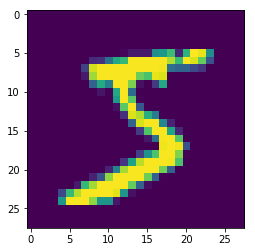

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential() 
#Receptive field becomes: 3X3
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26X26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu'))#24X24
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #22X22
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))#11X11


model.add(Convolution2D(32, 3, 3, activation='relu')) #9X9
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Convolution2D(10, 1, activation='relu'))#9X9
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(10, 3, 3, activation='relu'))#7X7
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu'))#5X5
model.add(BatchNormalization())



model.add(Convolution2D(10,5))


model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_31 (Batc (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_11 (Dropout)         (None, 22, 22, 16)        0         
__________

In [0]:

from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=45, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/45
60000/60000 [==============================] - 15s 255us/step - loss: 0.2758 - acc: 0.9139 - val_loss: 0.0598 - val_acc: 0.9806
Epoch 2/45
60000/60000 [==============================] - 11s 191us/step - loss: 0.0688 - acc: 0.9790 - val_loss: 0.0549 - val_acc: 0.9822
Epoch 3/45
60000/60000 [==============================] - 11s 189us/step - loss: 0.0536 - acc: 0.9834 - val_loss: 0.0345 - val_acc: 0.9883
Epoch 4/45
60000/60000 [==============================] - 11s 191us/step - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0297 - val_acc: 0.9908
Epoch 5/45
60000/60000 [==============================] - 12s 193us/step - loss: 0.0415 - acc: 0.9861 - val_loss: 0.0333 - val_acc: 0.9889
Epoch 6/45
60000/60000 [==============================] - 13s 210us/step - loss: 0.0359 - acc: 0.9886 - val_loss: 0.0315 - val_acc: 0.9901
Epoch 7/45
60000/60000 [==============================] - 11s 191us/step - loss: 0.0345 - acc: 0.9892 - val_loss: 0.

**Observation:**

I used 64 as batch size and increased the dropout to 0.3. As we observe this model performing good. At 15th Epoch model reached 99.46%. Still we can increase accuracy by using scheduling Learning Rate

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.028666380212982675, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.96309968e-10 8.26392608e-08 1.57156222e-07 2.32439010e-08
  6.39877778e-12 3.71306674e-09 5.23180951e-17 9.99999762e-01
  5.00837739e-12 3.18218590e-10]
 [9.15647735e-09 1.24820735e-11 1.00000000e+00 6.53286654e-16
  3.34683808e-10 5.92172777e-17 1.36217611e-12 1.01627386e-13
  1.09155123e-13 2.89393825e-15]
 [9.44773079e-12 9.99999762e-01 2.14798984e-10 9.89234042e-12
  5.02436563e-08 8.33691380e-11 1.21415681e-07 9.89366242e-08
  2.14507589e-09 1.73172410e-08]
 [9.99998689e-01 6.51672050e-11 1.09149427e-08 3.31895844e-10
  1.28788636e-12 5.07367393e-09 7.95596577e-07 4.89021157e-14
  5.12367933e-07 1.19062324e-08]
 [8.05483122e-16 3.77727538e-09 4.88060869e-10 4.97517454e-16
  9.99999404e-01 3.30744004e-14 2.18841460e-12 1.03660334e-07
  1.39409678e-10 4.47999554e-07]
 [1.38233554e-13 9.99999166e-01 2.23003335e-11 2.96444150e-14
  7.43836992e-08 7.82114513e-14 2.26771574e-10 7.06142202e-07
  4.02604061e-11 1.51183288e-09]
 [4.26662241e-19 1.56881548e-08 7.17933742e-14 3.07410637e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

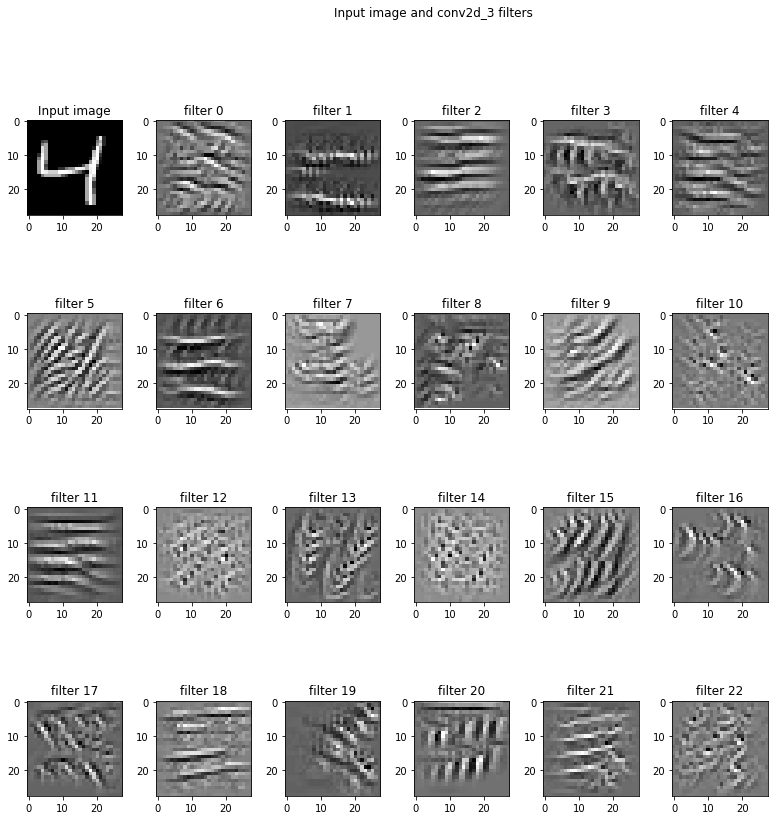

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()